# This project is to create a method to determine when a healthcare worker is on the verge of leaving and allow a hospital to create incentive to stay or start the hiring process to fill the void.  

## The dependent variable is attrition, using this dataset of past employees who have quit and their counterparts who have stayed we can help hospitals today with keeping a consistent staff size.



From location of data https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare?select=watson_healthcare_modified.csv:
Attrition of nurses in the US Healthcare system is at an all-time high. It is a major area of focus, especially for hospitals.

This dataset contains employee and company data useful for supervised ML, unsupervised ML, and analytics. Attrition - whether an employee left or not - is included and can be used as the target variable.

The data is synthetic and based on the IBM Watson dataset for attrition. Employee roles and departments were changed to reflect the healthcare domain. Also, known outcomes for some employees were changed to help increase the performance of ML models.

Here's an app I use as a demo based on this dataset and an ML classification model.

# Libraries Used

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

# Reading in Data

In [4]:
df = pd.read_csv("C:/Users/schne/Desktop/Nurse Turnover/watson_healthcare_modified.csv")
print("Data set size: ", df.shape)
df.tail()

Data set size:  (1676, 35)


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8
1675,1152329,27,No,Travel_Rarely,511,Cardiology,2,2,Medical,1,...,2,80,0,9,5,2,8,7,0,7


In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
Categorical_Columns = ['BusinessTravel', 'EducationField', 'Department', 'JobRole', 'MaritalStatus']

# Columns that need to be converted to 1,0
convert = ['Attrition', 'Gender', 'Over18','OverTime']

temp_all = ['BusinessTravel', 'EducationField', 'Department', 'JobRole', 'MaritalStatus','Attrition', 'Gender', 'Over18','OverTime']

The Basics of the dataset is mainly numerical columns and 7 categorical columns that will need to be dummied for machine learning purposes and 4 columns that will need to be converted into 1,0 format instead of the current format.

# Data Visualization

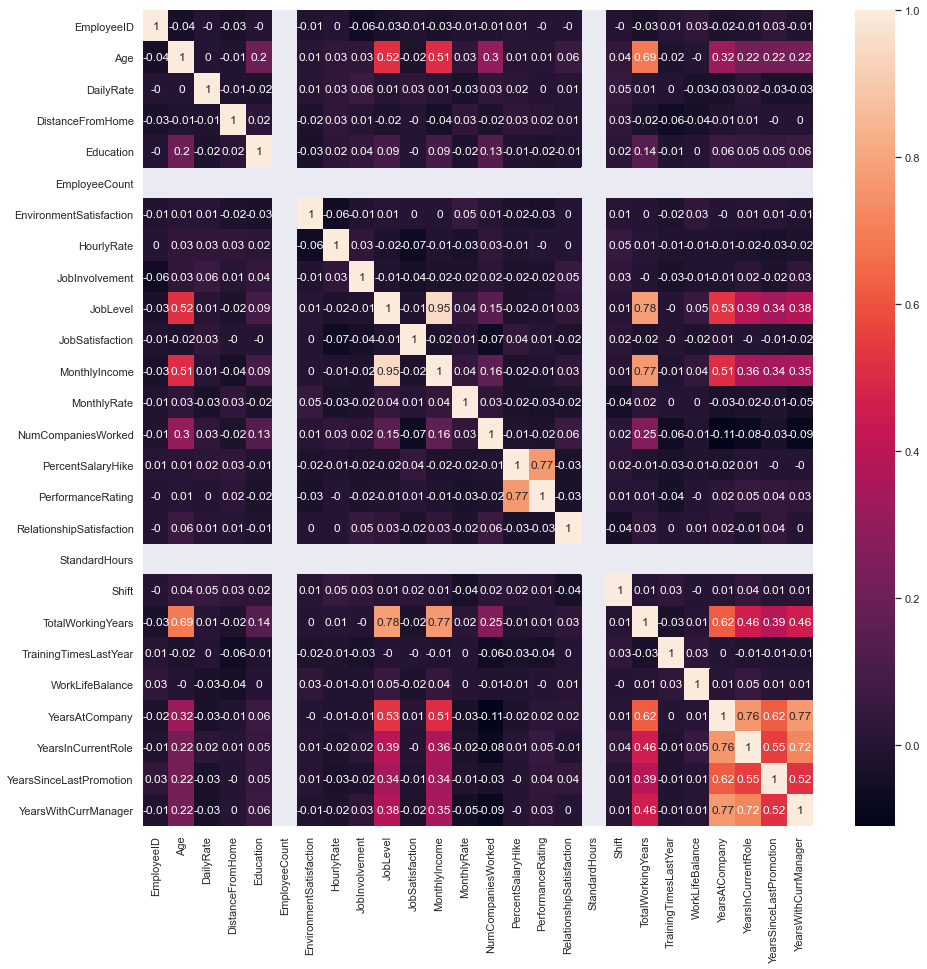

In [16]:
matrix = df.corr().round(2)
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(matrix, annot=True)
plt.show()

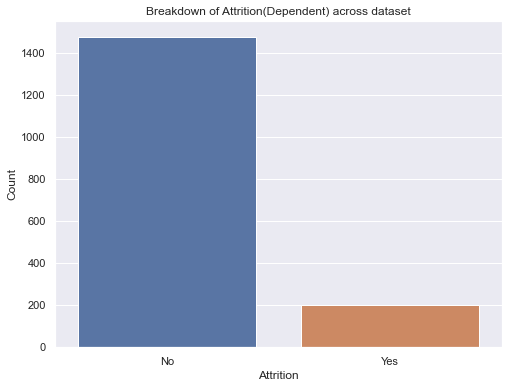

In [28]:
temp1=df.groupby('Attrition')['EmployeeID'].count().reset_index()
# temp1
sns.set(rc={"figure.figsize":(8, 6)})
sns.barplot(data = temp1, x='Attrition', y='EmployeeID')
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Breakdown of Attrition(Dependent) across dataset")
plt.show()

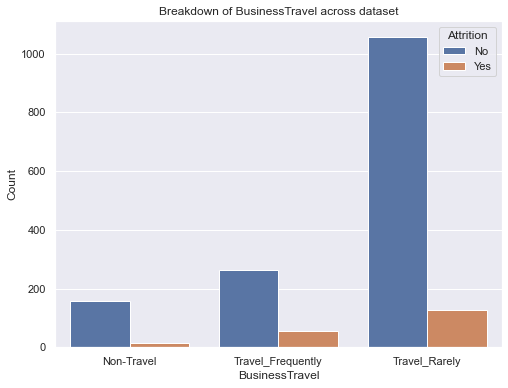

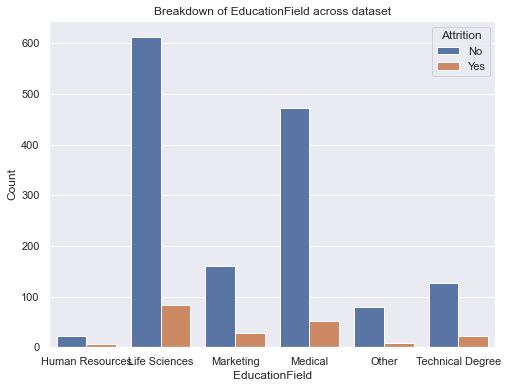

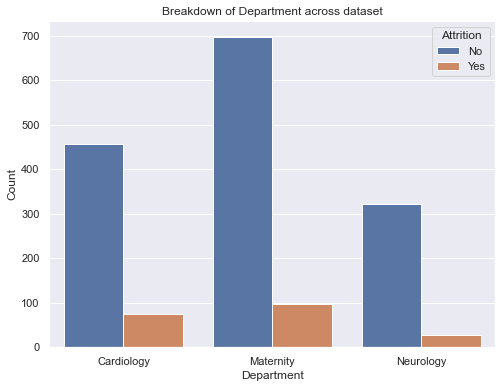

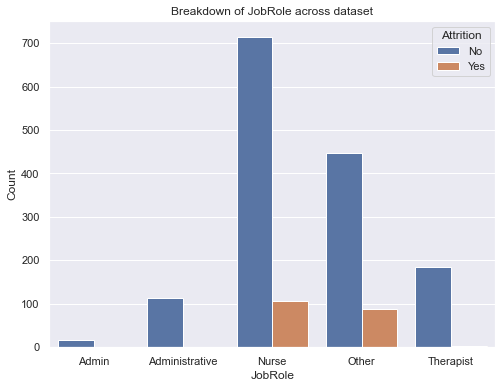

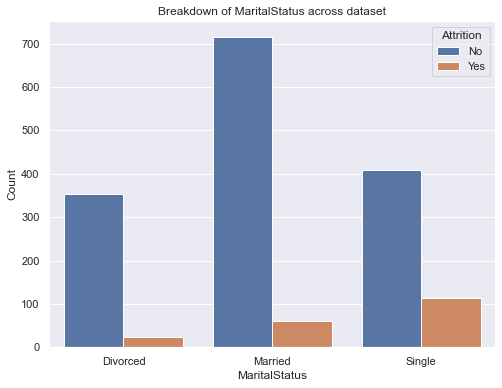

In [30]:
for x in Categorical_Columns:
    temp = df.groupby([x, 'Attrition'])["EmployeeID"].count().reset_index()
    sns.set(rc={"figure.figsize":(8, 6)})
    sns.barplot(data = temp, x=x, y='EmployeeID', hue='Attrition')
    plt.xlabel(f"{x}")
    plt.ylabel("Count")
    plt.title(f"Breakdown of {x} across dataset")
    plt.show()

# Classification

Using pycaret we will get a starting direction with what classifier we should build to best predict attrition within the healthcare industry.

From pycaret we can see the Ada Boost Classifier performed the best and the next step is to create the model and pipelines to accept new data and try to improve the model by doing the following:
data manipulation,
data reduction,
removing columns,
finding additional data sources
until we met a threshold that has been decided on the accuracy required for this project.

In [32]:
from pycaret.classification import *
s = setup(df, target = 'Attrition', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1676, 35)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9267,0.9278,0.5624,0.7790,0.6450,0.6062,0.6204,0.0230
lda,Linear Discriminant Analysis,0.9190,0.9299,0.5981,0.7041,0.6413,0.5964,0.6021,0.0100
gbc,Gradient Boosting Classifier,0.9165,0.9231,0.4795,0.7656,0.5820,0.5389,0.5608,0.0520
xgboost,Extreme Gradient Boosting,0.9156,0.9199,0.4810,0.7444,0.5777,0.5344,0.5531,0.1550
catboost,CatBoost Classifier,0.9156,0.9361,0.4033,0.8224,0.5348,0.4953,0.5361,2.2640
lightgbm,Light Gradient Boosting Machine,0.9139,0.9129,0.4852,0.7256,0.5758,0.5306,0.5468,0.0300
ridge,Ridge Classifier,0.9122,0.0000,0.3281,0.8979,0.4728,0.4372,0.5061,0.0230
rf,Random Forest Classifier,0.9062,0.8960,0.2843,0.8764,0.4211,0.3851,0.4612,0.0320
et,Extra Trees Classifier,0.9062,0.8838,0.3057,0.8200,0.4327,0.3957,0.4574,0.0300
nb,Naive Bayes,0.8823,0.7810,0.2486,0.5927,0.3365,0.2841,0.3231,0.0050


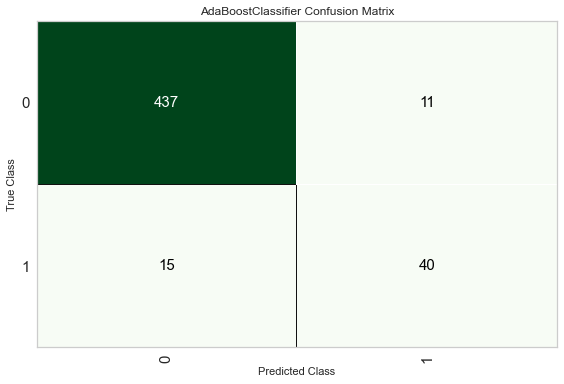

In [34]:
plot_model(best, plot = 'confusion_matrix')

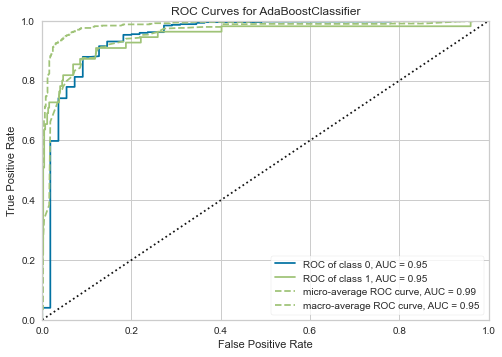

In [35]:
plot_model(best, plot = 'auc')

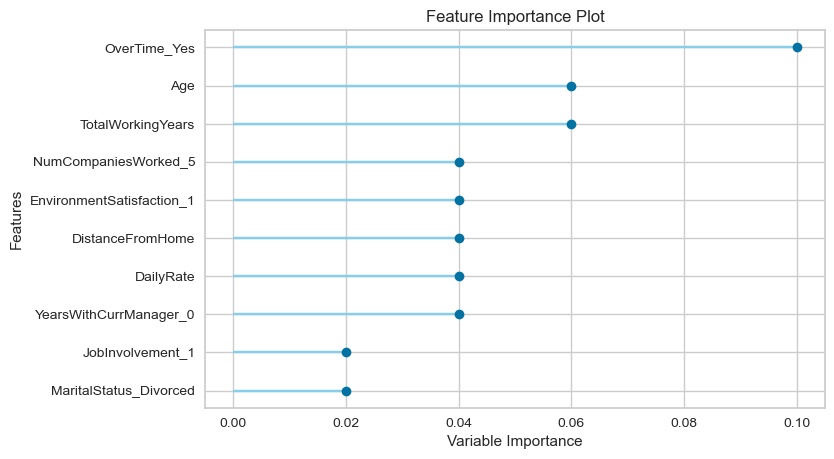

In [36]:
plot_model(best, plot = 'feature')

In [37]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9483,0.9486,0.7273,0.7843,0.7547,0.7259,0.7265
